## Deep Learning (Neural Networks)
They are often tailored very carefully to a specific use case.
We shall discuss about some relatively simple methods, namely `multilayer perceptrons(MLP)` for both classification and regression.
This can serve as starting point for more involved deep learning models.
These MLPs are also known as (vanilla) feed-forward neural networks or just neural network.

### The neural network model
MLPs can be viewed as generalization of linear models that perform multiple stages of processing to come to a decision.
Remember the prediction equation of linear regressor,

y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

In plain english, y is the weighted sum of input features x[0] to x[p], weighted by learned coefficients w[0] to w[p].

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


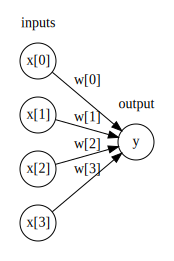

In [1]:
import mglearn, graphviz
mglearn.plots.plot_logistic_regression_graph()

A visualization of logistic regression where input features and predictions are shown as nodes, and the coefficients of connections are shown in between the nodes.

Here each node on the left represents an input feature, the connecting lines represent the learned coefficients and the node on the right represents the output, which is a weighted sum of the inputs.

In MLP, this process of computing weighted sums is repeated multiple times, first computing `hidden units` that represent an intermediate processing step which are again combined using weighted sums to yield the final result.


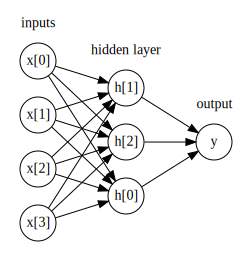

In [2]:
mglearn.plots.plot_single_hidden_layer_graph()

_Illustration of multilayer perceptron with a single hidden layer_

This model has a lot more coefficients (also called weights) to learn: there is one between every input and every hidden unit (which make up the _hidden layer_), and one between every unit in the hidden layer and the output. 

Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model, we need one extra trick. 

After computing a weighted sum of each hidden unit, a `non-linear` function is applied to to the result -- usually the _rectifying the non-linearity_ (also known as rectified linear unit or `relu`) or the _tangens hyperbolicus_ (`tanh`).

The result of this function is then used in the weighted sum that computes the output, y. The two functions are visualized below. The rlu cuts off values below zero, while tanh saturates to -1 for low inputs and +1 for high input values.

Either non-linear function allows the neural network to learn much more complicated functions than a linear model output.

Text(0, 0.5, 'relu(x), tanh(x)')

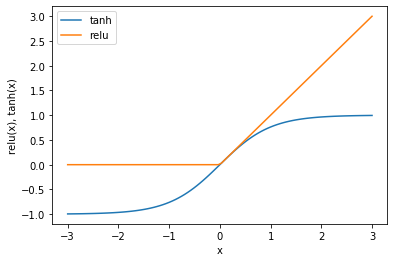

In [3]:
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

_The hyperbolic tangent activation function and the rectified linear activation function_

For small neural network pictured above, the full formula for computing `y` in the case of regression would be (when using a tanh nonlinearity):

h[0] = tanh(w[0,0]* x[0] + w[1,0] * x[1] + w[2,0] * x[2] + w[3,0] * x[3] + b[0])

h[1] = tanh(w[0,1]* x[0] + w[1,1] * x[1] + w[2,1] * x[2] + w[3,1] * x[3] + b[1])

h[2] = tanh(w[0,2]* x[0] + w[1,2] * x[1] + w[2,2] * x[2] + w[3,2] * x[3] + b[2])

y = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b

Here, w are the weights between input x and the hidden layer h, and v are the weights between hidden layer h and the output y. The weights v and w are learned from data, x => the input features, y is computed output and h => intermediate computations. 

An important parameter that needs to be set by the user is the number of nodes in the hidden layer. This can be as small as 10 for very small or simple datasets and as big as 10000 for very complex data. It is also possible to add additional hidden layers as below.

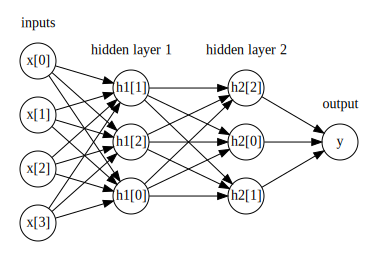

In [4]:
mglearn.plots.plot_two_hidden_layer_graph()

Having large neural networks made up of many of these layers of computation is what inspired them the term, "`deep learning`"

### Tuning neural networks

Text(0, 0.5, 'Feature 1')

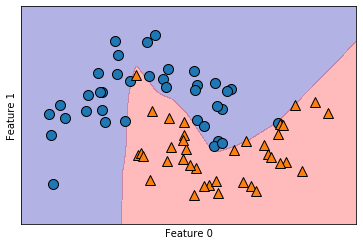

In [5]:
import mglearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                   random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

_Decision boundary learned by a neural network with 100 hidden units on the two_moons dataset_

As you can see, the neural network learned a very non-linear but relatively smooth decision boundary. We used solver = 'lbfgs' which we shall discuss later.

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset. We can reduce the number(which reduces the complexity of the model) and still get a good result.

Text(0, 0.5, 'Feature 1')

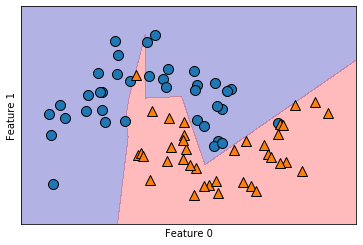

In [6]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

_This decision boundary is learned by a neural network with 10 hidden units on two_moons dataset_

With only 10 hidden units, the decision boundary looks somewhat more ragged. The default nonlinearity is relu show above. With a single hidden layer, this means the decision function will be made up of 10 straight line segments. 

If we want a smoother decision boundary, we could add more hidden units, add a second hidden layer or use tanh nonlinearity.

### using default activation (relu activation function)

Text(0, 0.5, 'Feature 1')

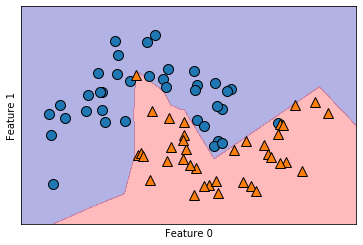

In [7]:
# using two hidden layers, with 10 units each

mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### using tanh nonlinearity

Text(0, 0.5, 'Feature 1')

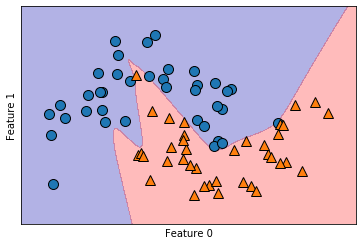

In [8]:
# using two hidden layers, with 10 hidden units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

_Decision boundary learned using 2 hidden layers with 10 hidden units each with `tanh` activation function_

We can control the complexity of a neural network using L2 penalty to shrink the weights towards zero, as we did for ridge regression and the linear classifiers. We can use alpha and its set to very low value (little regularization) by default. We can see the effect on alpha on the two_moons dataset, using 10 and 100 hidden layers.

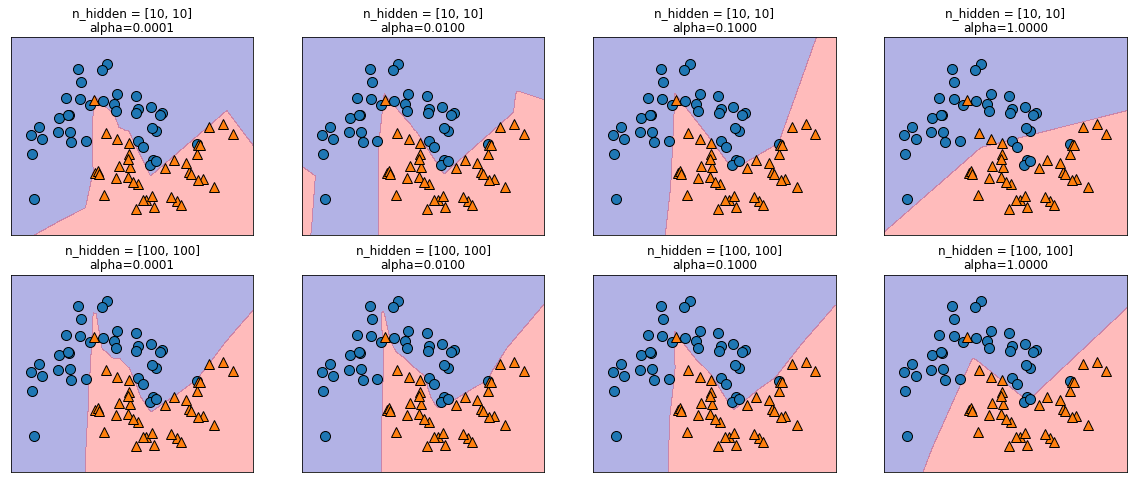

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden = [{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))


From the above graphs, we can see that the complexity of a neural network can be controlled by 

* Number of hidden layers
* Number of units in each hidden layer
* Regularization (alpha) and much more

An important property of NN is that their weights are set randomly before learning is started and this random initialization affects the model that is learned. 

I.e., Even when using the exact same parameters, we can obtain different models when using different random seeds (random_state).

If the networks are large, their complexity is chosen properly in way that shouldn't affect the accuracy too much.

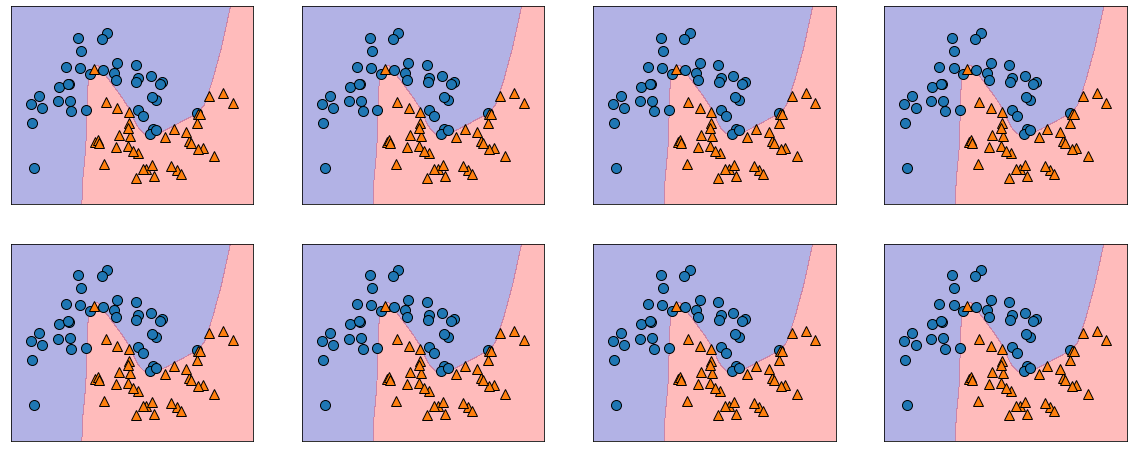

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=1,
                        hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    

_Decision functions learned with same parameters but with different random initializations_

### Use case of Neural Network (NN) onto a real-world data (breast-cancer)

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print ("Cancer data per-feature maxima : \n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima : 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print ("Accuracy on train set : {:.3f}".format(mlp.score(X_train, y_train)))
print ("Test Accuracy : {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on train set : 0.939
Test Accuracy : 0.916


* As we can see the accuracy of this NN model is quite good, but not as good as the other models. 
* As in the earlier SVC example, this is likely due to scaling of the data. 
* NN also expect all input features to vary in similar way, i.e., mean = 0 and variance = 1.
* Again, for now, we will do by hand, i.e., `StandardScaler` to do automatically in (Unsupervised learning)

In [16]:
## Computing the mean value per feature in train set;
mean_on_train = X_train.mean(axis=0)

## Compute the SD of each feature in train set;
std_on_train = X_train.std(axis=0)

## Subtracting the mean and scale the inverse std;
X_train_scaled = (X_train - mean_on_train) / std_on_train

## afterward, mean = 0 and std = 1
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print ("Train accuracy : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print ("Test accuracy : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Train accuracy : 0.991
Test accuracy : 0.965


D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



* Much better results after scaling and quite competitive.
* Warning says we have reached maximum iterations.
* This is part of the `adam` algorithm for learning the model and tells us we should increase the number of iterations.


In [17]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train_scaled, y_train)

print ("Train accuracy : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print ("Test  accuracy : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Train accuracy : 1.000
Test  accuracy : 0.972


* Increasing the no of iterations improved the training performance not the test performance much.
* Still, the model is performing quite well. To get better generalization performance, we decrease the model's complexity.
* Alpha parameter (vary it from 0.0001 to 1) to add stronger regularization of the weights.

In [18]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0).fit(X_train_scaled, y_train)

print ("Train accuracy : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print ("Test  accuracy : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Train accuracy : 0.988
Test  accuracy : 0.972


* We can see that this is the best results as all other models also got the generalization performance at 0.972
* This means that all models made this exact same mistake (4 mistakes)
* This might be a consequence of dataset being very small, or it may be because these points are really different from the rest.

Though we can analyze what a NN model has learned, its much tricky than a linear model or tree-based model.
* One way to introspect is to look at the weights in model. _Refer scikit-learn example gallery._
* For `Breast Cancer dataset`, this might be a bit hard to understand.
* The below plot shows the weights that were learned connecting the input to the first hidden layer.
* The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden units. 
* Light colors represent large positive values, while dark represents -ves.

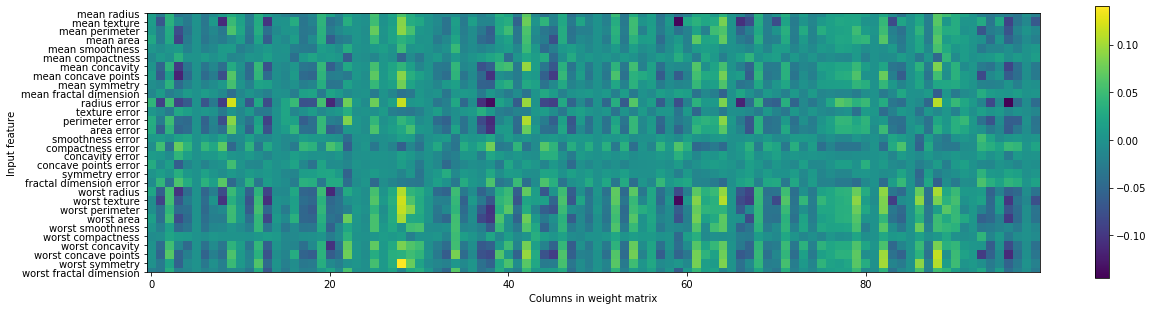

In [19]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

_Heat map of the first layer weights in a Neural Network learned on the Breast cancer data_

* One possible inference is that features that have very small weights for all of the hidden units are "less important" to the model. 
* "mean smoothness" and "mean compactness" in addition to "smoothness error" and "fractal dimension error" have relatively low weights compared to others. 
* This could mean that these are less important features or possibly we didn't represent them in a way the NN could use

* We could visualize the weights connecting the hidden layer to the output, but those are even harder to interpret.
* `MLPClassifier` and `MLPRegressor` provide easy-to-use interfaces, they only capture a small subset of what is possible with NN.

* Going outside of scikit-learn libraries exclsuive for deep learning, (for Python) we can use,

    1) keras - can use tensor-flow or theano
    
    2) lasangas - Built on theano library
    
    3) tensor-flow


* These libraries provide a much more flexible interface to build Neural networks and track the rapid progress in deep learning.
* All the popular deep learning libraries also allow the use of high performance GPU (Graphics Processing Unit) which scikit-learn does not support.
* Using GPUs allows us to accelerate computations by factores of 10x to 100x and they are essential for deep-learning methods to large-scale datasets.


* **Strength** :
    1) NN have reemerged as state-of-the-art models in many applications of machine learning.
    
    2) Their main advantage is that they're able to capture information contained in large amounts of data and build incredibly complex models.
    
    3) With enough computation time, data and careful tuning of parameters, NN often beat other machine learning algorithms (both Classification and Regression)


* **Weakness** :
    1) Takes long time to train and careful processing of data (as we seen here)
    
    2) Similar to SVMs, they work best with "homogenous" data where all features have similar meanings.
    
    3) For different feature based data, tree-based models might work better. Tuning neural network parameters is also an art unto itself.
    
    
* **Parameter** : 
    1) Number of hidden layers
    
    2) Number of hidden units per each layer. Should probably start with 1 or 2 and expand from there to understand.
    
    3) The number of nodes per hidden layer is often similar to number of input features, but rarely higher than in the low to mi thousands.
    
    4) Number of weights or coefficients that are learned.
    
Firstly adjust the parameters in NN such that first create a network large enough to **overfit** and make sure the task can actually be learned by the network. Once after that, shrink the network or increase the alpha to add regularization which will improve generalization performance.

We usually focus on, Number of layers, Number of nodes per layer, the regularization and the non-linearity. 
Currenly, we have 2 choices for learning our model to learn.

    1) 'Adam' - default choice of learning mode; this works well in most situations but is quite sensitive to scaling of data (mean = 0 and variance = 1)
    2) 'lbfgs' - quire robust but might take a long time on larger models or larger datasets.
    3) 'sgd' - An advanced mode, which is what many deep learning researchers use.
    
_**Note** : fit() resets a model.
An important propertly of scikit-learn models is that calling fit() will always reset everything a model previously learned_

### Uncertainty Estimates from Classifiers

Two different functions in scikit-learn that can be used to obtain uncertainty estimates (ability for a model on a certain note that a particular prediction point is the right class) from classifiers : 

    i) decision_function
    ii) predict_proba
    
Most classifiers have at least one of them, and many classifiers have both of them. Consider _GradientBoostingClassifer_ which has both a decision_function and a predict_proba method as below:

In [20]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print ("Train accuracy : {:.3f}".format(gbrt.score(X_train, y_train_named)))
print ("Test accuracy : {:.3f}".format(gbrt.score(X_test, y_test_named)))

Train accuracy : 1.000
Test accuracy : 0.840


### The decision function

In the binary classification case, the return value of decision_function is of shape (n_samples, ) and it returns one floating-point number for each sample:


In [26]:
print ("X_test shape : {}".format(X_test.shape))
print ("Decision function shape : {}".format(
    gbrt.decision_function(X_test).shape))

X_test shape : (25, 2)
Decision function shape : (25,)


This value encodes how strongly the model believes a data point to belong to the "positive" class, in this case class 1. Positive value indicate a preference for the positive class, and negative values indicate a preference for the "negative" (other) class:


In [26]:
# show the first few entries of decision_function
print ("Decision function :\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function :
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [27]:
print ("Threshold decision function : \n{}".format(
    gbrt.decision_function(X_test) > 0))
print ("Prediction : \n{}".format(gbrt.predict(X_test)))

Threshold decision function : 
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Prediction : 
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [28]:
## To fully recover the output of predict class, you need to make use of the classes_ attribute:

# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]

#pred is the same of the output of gbrt.predict
print ("Pred is equal to predictions : {}".format(
    np.all(pred == gbrt.predict(X_test))))

Pred is equal to predictions : True


The range of _decision_function_ can be arbitrary and depends on the data and the model parameters.


In [29]:
decision_function = gbrt.decision_function(X_test)
print ("Decision function minimum : {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Decision function minimum : -7.69 maximum: 4.29


This arbitrary scaling makes the output of _decision_function_ hard to interpret.
In the following example, we plot the decision_function for all points in 2D plane using a color coding, next to a visualization boundary. 

Training points = Circles

Test points = Triangles

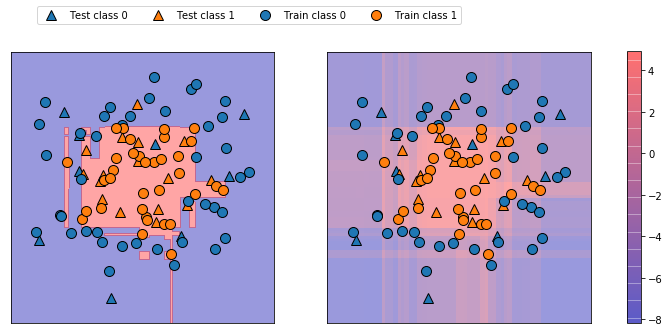

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot the training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_label("Feature 0")
    ax.set_label("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
               "Train class 1"], ncol=4, loc=(.1, 1.1))

_Decision boundary(left) and decision function(right) for a gradient boosting model on a two-dimensional toy dataset_

Encoding not only the predicted outcome but also how certain the classifier is providing additional information. However, in this visualization, it is hard to make out the boundary between the two classes.

### Predicting Probabilities

The output of _predict_proba_ function is a probability for each class and is often more easily understood thatn the output of decision_function. It is always of shape (n_samples, 2) for binary classification:

In [35]:
print ("Shape of Test-probabilities :{}".format(gbrt.predict_proba(X_test).shape))
print ("Shape of Train-probabilities :{}".format(gbrt.predict_proba(X_train).shape))

Shape of Test-probabilities :(25, 2)
Shape of Train-probabilities :(75, 2)


The first entry in each row/record is the estimated probability of first class and the second column value is the estimated probability of second class. Because it is a probability, the output of _predict_proba_ is always between 0 and 1, and thier sum is always = 1.

In [40]:
# show the first few rows of the predict_proba function
print ("Predicted probability : \n{}".format(
        gbrt.predict_proba(X_test[:6])))

Predicted probability : 
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


Because the sum of probability would always be 1, exactly one of the classes will have above 50% and that class would be chosen for prediction.
    * We can see in the above output that the classifier is relatively certain for most points.
    * How well the uncertainty actually reflects in the data depends on the model and the parameters.
    * A model that is more **overfitted** tends to make more certain predictions, even if they are wrong.
    * A model with less **complexity** usually has more uncertainty in its predictions.
    * A model is called _calibrated_ if the reported uncertainty matches how correct it is. A prediction made with 70% certainty would be correct 70% of the time

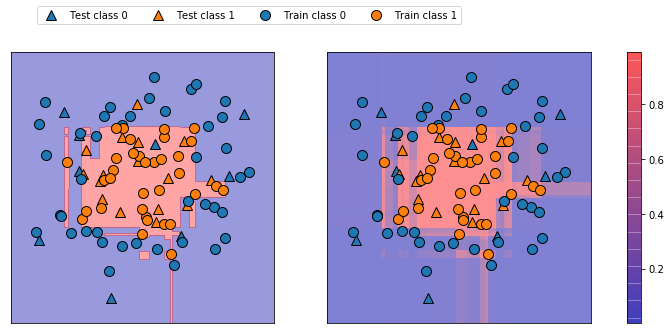

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot the train and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_label("Feature 0")
    ax.set_label("Feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", 
                "Train class 1"], ncol=4, loc=(.1,1.1))

_Decision boundary(left) and decision function(right) for the gradient boosting model_

The boundary in this plot are much more well-defined and the small areas of the uncertainty are clearly visible.

### Uncertainty in Multiclass classification

So far we have covered about the decision boundary and the predict proba for binary class classification. But, we can also use them for multiclass classification. Lets take the Iris dataset which is a 3 class classification scenario.


In [42]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [43]:
print ("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

#plot the first few entries of the decision function
print ("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


    * In multiclass case, the *shape of decision_function* has _(n_samples, n_classes)_
    * Each column provides a "certainty score" for each class, where a large score means that a class is more likely and small score means the class is less likely.
    * You can recover the predictions from these scores by finding the maximum per row for each data point

In [46]:
print ("Argmax of decision function : \n{}".format(
    np.argmax(gbrt.decision_function(X_test[:10]),axis=1)))
print ("Predictions : \n{}".format(gbrt.predict(X_test[:10])))

Argmax of decision function : 
[1 0 2 1 1 0 1 2 1 1]
Predictions : 
[1 0 2 1 1 0 1 2 1 1]


Note : 
    * The output of predict_proba has same shape (n_samples, n_classes)
    * Again, the probabilities for the possible classes for each data point sums to 1.

In [47]:
# show the first few entries of predict_proba
print ("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))

# show that sums across rows are one
print ("Sums : {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums : [1. 1. 1. 1. 1. 1.]


Again, we can recover the predictions by computing the argmax of predict_proba

In [51]:
print ("Argmax of predicted proba : \n{}".format(
    np.argmax(gbrt.predict_proba(X_test[:20]),axis=1)))
print ("Predictions : \n{}".format(gbrt.predict(X_test[:20])))

Argmax of predicted proba : 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2]
Predictions : 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2]


To _summarize_, **predict_proba** and **decision_function** always have shape (n_samples, n_classes) - apart from *decision_function* in the special binary case. In the binary case, **decision_function** only has one column, corresponding to the "positive" class classes_[1].

    * You can recover the prediction when there are n_classes many columns by computing the argmax across columns.
    * Be careful, though, if your classes are strings, or you use integers but they are not consecutive and starting from 0.
    * If you want to compare results from predict to results from decision_function or predict_proba, make sure to use the classes_ attribute to get the actual names

In [55]:
from sklearn.linear_model import LogisticRegression

# use the below commented line for warnings suppresion
#logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
logreg = LogisticRegression()

#represent each target by its class name in iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print ("Unique class in training data : {}".format(logreg.classes_))
print ("Predictions: {}".format(logreg.predict(X_test)[:10]))

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis = 1)

print ("Argmax of decision function : {}".format(argmax_dec_func[:10]))
print ("Argmax combined with classes_ : {}".format(
    logreg.classes_[argmax_dec_func][:10]))

Unique class in training data : ['setosa' 'versicolor' 'virginica']
Predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Argmax of decision function : [1 0 2 1 1 0 1 2 1 1]
Argmax combined with classes_ : ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Summary and Outlook

Remembering :

    * Model complexity
    * Generalization (or learning a model that is able to perform well on new, previously unseen data)
    * Underfitting (which describes a model that can't capture the variations present in the training data)
    * Overfitting (which describes a model that focus too much on training data and is not able to generalize)
    * Wide array of Machine Learning models for Classification and Regression.
    * Their advantages and disadvantages.
    * How to control the model complexity for each model.
    * We saw that setting the right parameters is important for good performance (accuracy and speed)
    * Some models are sensitive to how we represent the input data (scaling / applying log)
    * So, blindly applying an algorithm to dataset without understanding the assumptions the model makes and the meanings of the parameter settings will rarely lead to an accurate model.
    * Usually, remember the below tricks for each model while designing a model.
    
    * Nearest Neighbors :
        - Suitable for small datasets
        - Good for a baseline model choice,
        - Easy to explain

    * Linear models : 
        - Go-to as a first algorithm
        - Good for very large datasets
        - Good for high-dimensional data

    * Naive Bayes :
        - Only usable for classification
        - Even faster than linear model
        - Good for very large dataset and high-dimensional data
        - Often less accurate than linear model

    * Decision trees : 
        - Very fast
        - Don't need scaling
        - Can be visualized
        - Easily explained

    * Random forests :
        - Nearly always perform better than a single decision tree
        - Very robust and powerful
        - Don't need scaling
        - Not good for very high-dimensional sparse data.
        
    * Gradient Boosted decision trees :
        - Often slightly more accurate than random forests.
        - Slower to train but faster to predict than random forests
        - Smaller in memory.
        - Need more parameter tuning than random forests.

    * Support Vector Machines :
        - Powerful for medium-sized datasets of features with similar meaning (mean = 0 and variance = 1)
        - Requires scaling of input data
        - Sensitive to parameters

    * Neural Networks :
        - Can build very complex models
        - Particulary of large datasets
        - Sensitive to scaling of input data and to choice of parameters
        - Large models need a long time to train
        
General note to remember -
When working with new dataset, it is in general a good idea to start with a simpler model such as linear model or Naive Bayes or Nearest neighbors classifier and see how far you get.
After understanding more about the data, you can consider moving to an algorithm that can build more complex models, such as Random forests, Gradient boosted decision trees, SVMs, or a Neural Network.

We should have some idea about how to apply, tune and analyze the models we discussed here.

In this chapter, we focused on the binary classification case, as usually this is the easiest to understand.
Try applying any of these algorithms to the built-in datasets under scikit-learn like _boston_housing_ or _diabetes_ datasets for regression, or the _digits_ datasets for multiclass classification. 

Playing around with these algorithms on different datasets will give us a better feel for how long they need to be trained, how easy it is to analyze them and how sensitive they are to representation of the data. While we analyzed the consequences of different parameter settings for algorithms, we investigated, building a model that actually generalizes well to new data in production is a bit trickier than that.

We will see how to properly adjust parameters and how to find good parameters automatically later.